# Imports:

In [49]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
from os.path import join, sep
import Config as c
valid_users = c.valid_users
data_path = c.data_path
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data:

In [2]:
clinic_df = pd.read_pickle(join(c.data_path, 'clinic_processed_pickle.p'))
home_df = pd.read_pickle(join(c.data_path, 'home_processed_pickle.p'))
reminders_df = pd.read_pickle(join(c.data_path, 'reminder_five_minutes_processed_pickle.p'))

In [76]:
statistics = ['median', 'mean', np.std]

# Number of unique assessments in each data table:

In [61]:
clinic_df[['user_id', 'assessment_id']].groupby('user_id').assessment_id.nunique()

user_id
25     2
45     1
51     1
57     1
63     1
74     1
82     1
94     1
108    1
Name: assessment_id, dtype: int64

In [62]:
home_df[['user_id', 'assessment_id']].groupby('user_id').assessment_id.nunique()

user_id
8       25
25      30
45      56
51      65
57      99
63      12
74     134
82      34
94       8
108     37
Name: assessment_id, dtype: int64

In [64]:
reminders_df[['user_id', 'reminder_id']].groupby('user_id').reminder_id.nunique()

user_id
8       48
45       6
51      35
57     305
63      28
74     204
82      73
94      18
108     78
Name: reminder_id, dtype: int64

In [88]:
def plot_statistics_distribution(df, grouping_identifier, target_variable, statistics, min_val=0, max_val=4):
    hist_range = (min_val, max_val)
    ticks = range(min_val, max_val+1)
    print('Histogram of %s across all records:' % (target_variable))
    plt.hist(df[target_variable], range=hist_range, )
    plt.show()
    for stat in statistics:
        agg_df = df[[grouping_identifier, target_variable]].groupby(grouping_identifier, as_index=False).agg(stat)
        if stat==np.std:
            stat = 'standard deviation'
        agg_df.columns = [grouping_identifier, stat]
        stat_vals = agg_df[stat]
        print('\n', target_variable, 'per-patient %s distribution:' % (stat))
        if stat!=np.std:
            hist_range = hist_range
        plt.hist(stat_vals, range=hist_range)
        plt.show()
    df['binary_report'] = df[target_variable]>=1
    binary_avg = df[[grouping_identifier, 'binary_report']].groupby(grouping_identifier, as_index=False).agg('mean')
    print('\n Per-patient fraction of positive reports distribution:')
    plt.hist(binary_avg['binary_report'])
    plt.show()

Histogram of patient_report_value across all records:


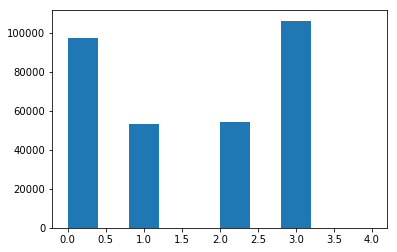


 patient_report_value per-patient median distribution:


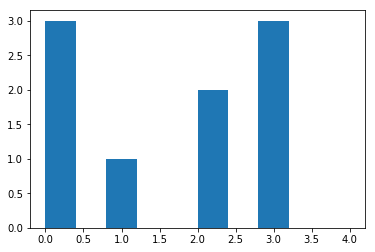


 patient_report_value per-patient mean distribution:


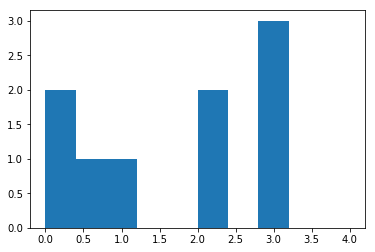


 patient_report_value per-patient standard deviation distribution:


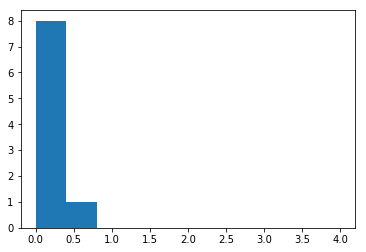


 Per-patient fraction of positive reports distribution:


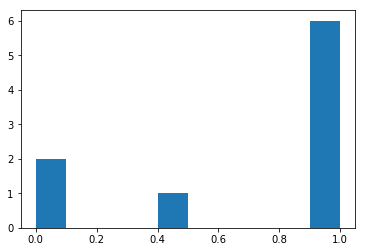

In [89]:
plot_statistics_distribution(clinic_df, 'user_id', 'patient_report_value', statistics)

Histogram of clinician_report_value in all records:


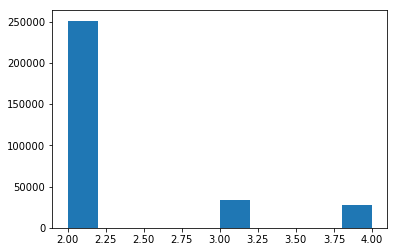


 clinician_report_value per-patient median distribution:


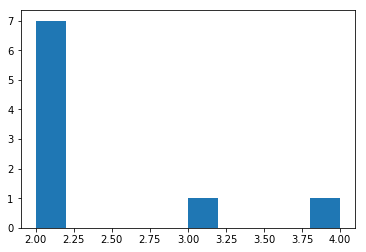


 clinician_report_value per-patient mean distribution:


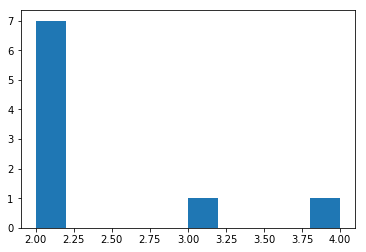


 clinician_report_value per-patient standard deviation distribution:


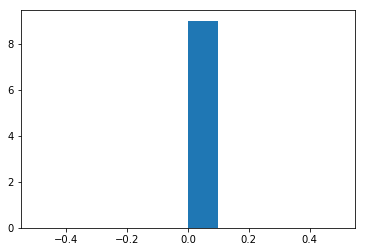


 Per-patient fraction of positive reports distribution:


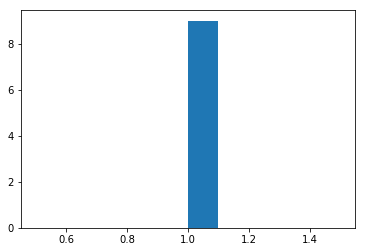

In [85]:
plot_statistics_distribution(clinic_df, 'user_id', 'clinician_report_value', statistics)

Histogram of patient_report_value in all records:


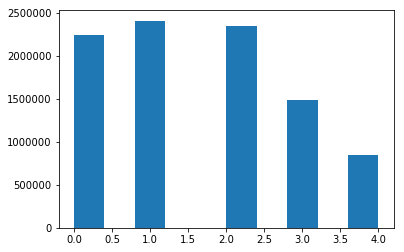


 patient_report_value per-patient median distribution:


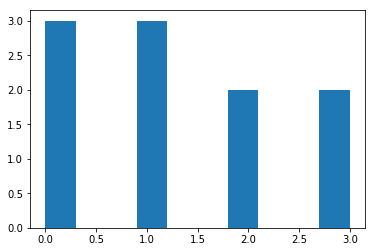


 patient_report_value per-patient mean distribution:


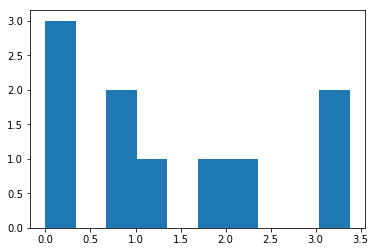


 patient_report_value per-patient standard deviation distribution:


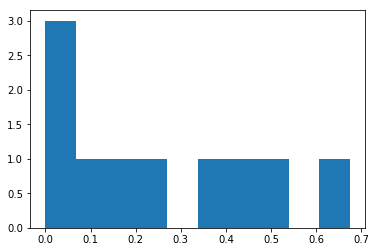


 Per-patient fraction of positive reports distribution:


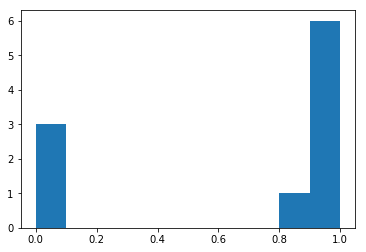

In [83]:
plot_statistics_distribution(home_df, 'user_id', 'patient_report_value', statistics)


 patient_report_value per-patient median distribution:


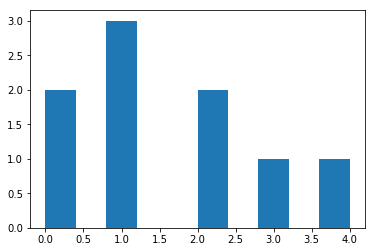


 patient_report_value per-patient mean distribution:


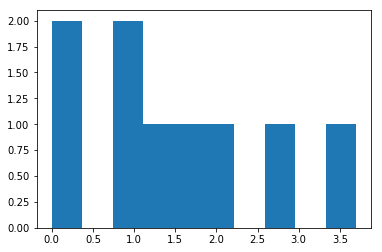


 patient_report_value per-patient standard deviation distribution:


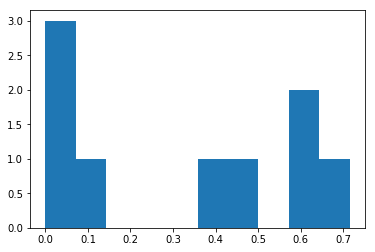


 Per-patient fraction of positive reports distribution:


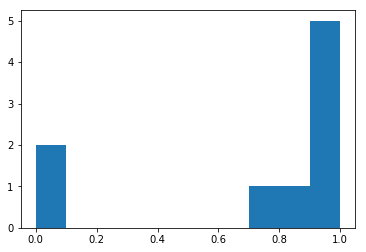

In [79]:
plot_statistics_distribution(reminders_df, 'user_id', 'patient_report_value', statistics)

### Pearson's correlation between the patients' and the clinicians' Chorea level reports at the lab:

In [97]:
clinicians_reports = clinic_df.clinician_report_value
patients_reports = clinic_df.patient_report_value
coef, p_val = pearsonr(patients_reports, clinicians_reports)
print('Correlation of: %.3f \np-value of: %.3f' % (coef, p_val))

Correlation of: 0.395 
p-value of: 0.000


### Pearson's correlation between the patients' Chorea level reports at home vs. at the lab:

In [98]:
home_reports = home_df.patient_report_value
lab_reports = clinic_df.patient_report_value
coef, p_val = pearsonr(home_reports, lab_reports)
print('Correlation of: %.3f \np-value of: %.3f' % (coef, p_val))

ValueError: operands could not be broadcast together with shapes (9332170,) (311298,) 

# Raw Data Analysis:

In [99]:
clinic_df['total_energy'] = np.sqrt((clinic_df.x)**2 + (clinic_df.y)**2 + (clinic_df.z)**2)

### Pearson's correlation between the total energy and the patients' Chorea level reports at the lab:

In [103]:
energy = clinic_df.total_energy
patients_reports = clinic_df.patient_report_value
coef, p_val = pearsonr(patients_reports, energy)
print('Correlation of: %.3f \np-value of: %.3f' % (coef, p_val))

Correlation of: 0.037 
p-value of: 0.000


### Pearson's correlation between the total energy and the clinicians' Chorea level reports at the lab:

In [104]:
clinicians_reports = clinic_df.clinician_report_value
energy = clinic_df.total_energy
coef, p_val = pearsonr(energy, clinicians_reports)
print('Correlation of: %.3f \np-value of: %.3f' % (coef, p_val))

Correlation of: -0.048 
p-value of: 0.000
